In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"enriquiytchen","key":"19d3d3113390a25ea68210090664c97e"}'}

In [18]:
# Install Kaggle library
!pip install -q kaggle

# Make a hidden .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json there
!cp /content/kaggle.json ~/.kaggle/

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download uciml/iris
# Unzip it
!unzip iris.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iris.zip
replace data/Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/Iris.csv           
replace data/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/database.sqlite    


In [25]:
import os

print(os.listdir("data"))

['database.sqlite', 'Iris.csv']


In [50]:
import pandas as pd

iris = pd.read_csv("data/Iris.csv")

print(iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [46]:
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [61]:
print(iris.head(5))
print(iris.tail(2))
print(iris[["SepalLengthCm", 'Species']])
print(iris.iat[1,0])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
148  Iris-virginica  
149  Iris-virginica  
     SepalLengthCm         Species
0              5.1     Iris-setosa
1              4.9     Iris-setosa
2              4.7     Iris-setosa
3              4.6     Iris-setosa
4              5.0     Iris-setosa
..             ...             ...
145            6

In [87]:
# fetch 5.0
print(iris.iat[4,1])
print(iris.at[4,"SepalLengthCm"])
print(iris.iloc[4,1])
print(iris.loc[[4],["SepalLengthCm"]])

5.0
5.0
5.0
   SepalLengthCm
4            5.0


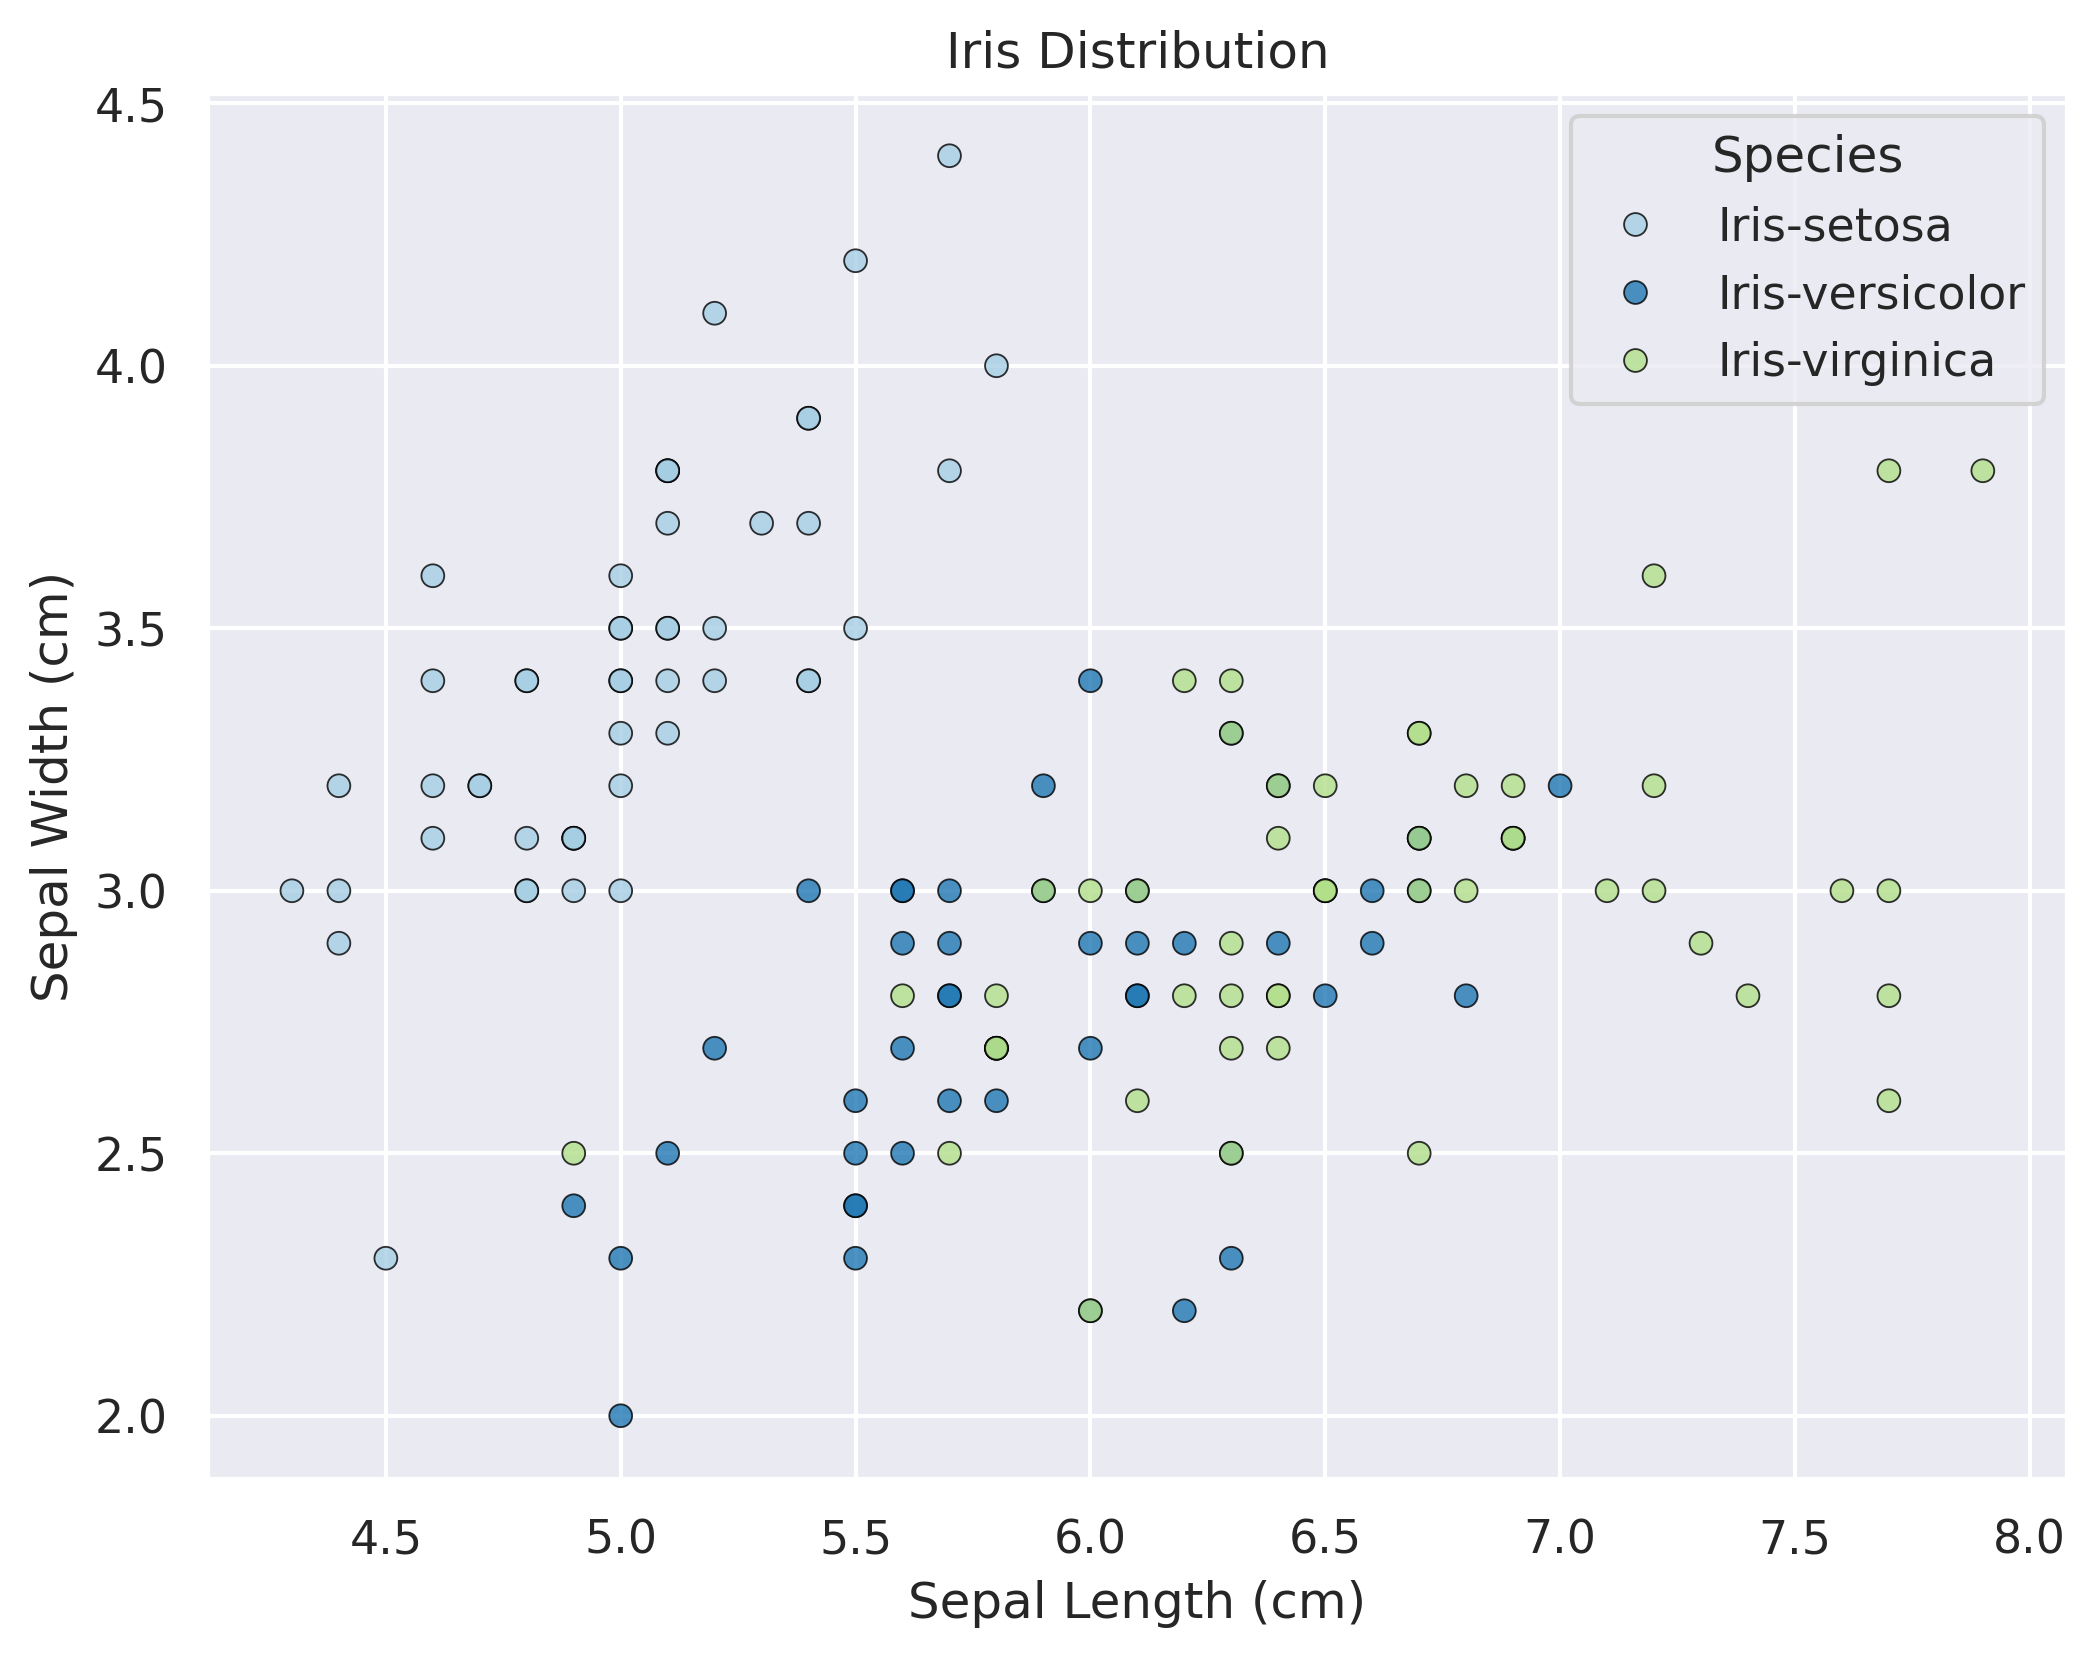

In [108]:
# matplotlab

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6), dpi = 300)

sns.set_theme(style = "darkgrid")
sns.scatterplot(iris,
                x = "SepalLengthCm",
                y = "SepalWidthCm",
                palette = "Paired",
                hue="Species",
                s = 30,
                alpha = 0.8,
                edgecolor = "black")
plt.title("Iris Distribution")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.show()

<Figure size 2400x1800 with 0 Axes>

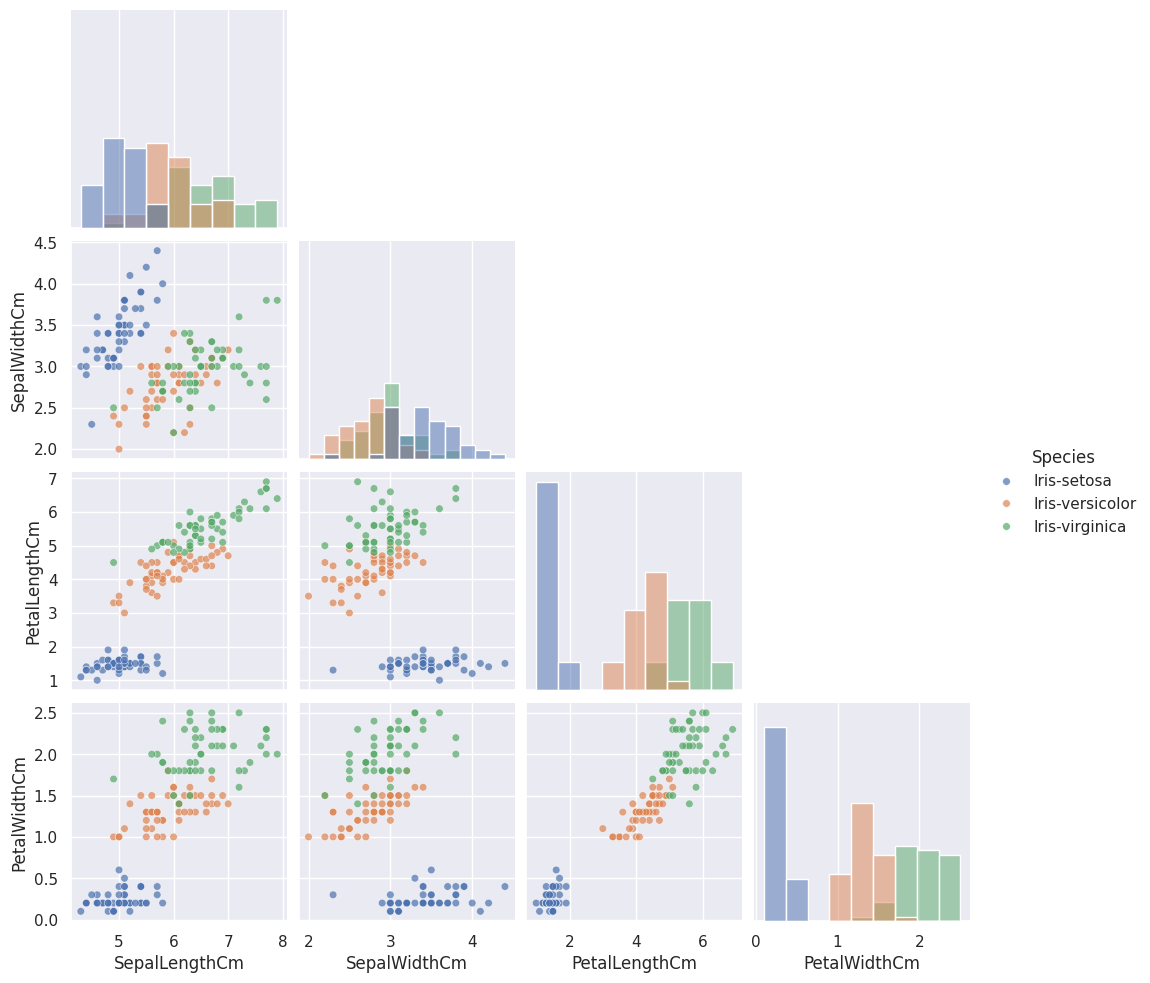

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6), dpi = 300)

sns.set_theme(style="darkgrid")

sns.pairplot(
    iris,
    vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
    hue="Species",
    corner=True,         # set True if you only want the lower triangle
    diag_kind="hist",     # or "kde"
    plot_kws={"alpha": 0.7, "s": 30},
)

plt.show()